ValueError: num must be an integer with 1 <= num <= 18, not 19

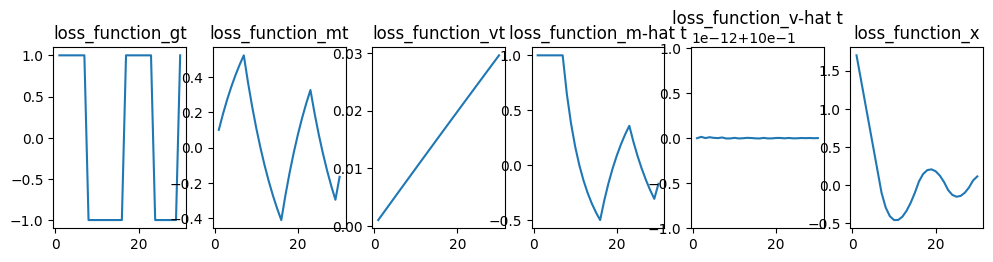

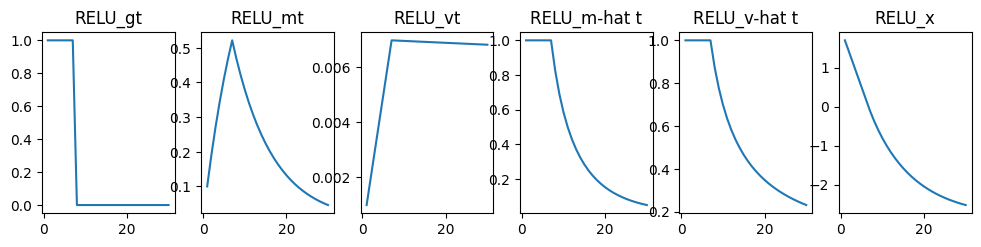

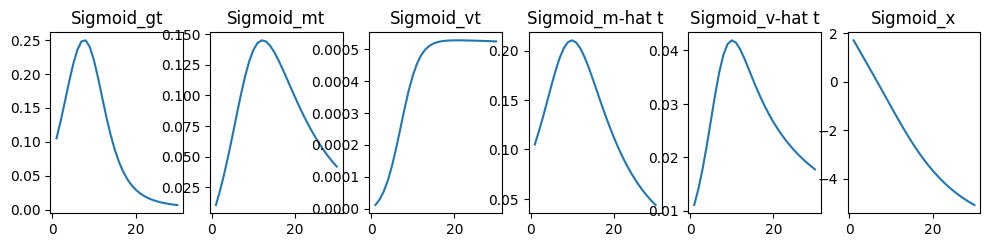

<Figure size 1200x800 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

activation_function = ['RELU','Sigmoid','|x|']

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the absolute value function
def absolute_value(x):
    return np.abs(x)

plot_count =0 
for fx in activation_function:

    # Initialize parameters
    x = 2.0  # Initial value of x
    learning_rate = 0.3
    beta1 = 0.9  # First moment estimate decay rate
    beta2 = 0.999  # Second moment estimate decay rate
    epsilon = 1e-7  # Small constant for numerical stability
    iterations = 30
    # Initialize variables for Adam optimizer
    mt = 0
    vt = 0
    t = 0
    gt_values = []
    mt_values = []
    vt_values = []
    m_hat_t_values = []
    v_hat_t_values = []
    x_values = []
    # Optimization loop
    for t in range(1, iterations + 1):
        if(fx=='RELU'):
            # gt = 1  # Gradient of the ReLU function with respect to x (for simplicity)
            if x < 0:
                gt = 0  # Gradient of RELU when x < 0
            elif x > 0:
                gt = 1  # Gradient of RELU when x >= 0
        elif(fx=='Sigmoid'):
            gt = sigmoid(x) * (1 - sigmoid(x))  # Gradient of the Sigmoid function with respect to x
        elif(fx=='|x|'):
            if x < 0:
                gt = -1  # Gradient of |x| when x < 0
            elif x > 0:
                gt = 1  # Gradient of |x| when x >= 0
            
        mt = beta1 * mt + (1 - beta1) * gt
        vt = beta2 * vt + (1 - beta2) * (gt ** 2)
        
        m_hat_t = mt / (1 - beta1 ** t)
        v_hat_t = vt / (1 - beta2 ** t)
        
        x = x - learning_rate * m_hat_t / (np.sqrt(v_hat_t) + epsilon)
        
        # Store values for plotting
        gt_values.append(gt)
        mt_values.append(mt)
        vt_values.append(vt)
        m_hat_t_values.append(m_hat_t)
        v_hat_t_values.append(v_hat_t)
        x_values.append(x)

    # Plotting
    plt.figure(figsize=(12, 8))
    plot_count = plot_count+1
    plt.subplot(3, 6, plot_count)
    plt.plot(range(1, iterations + 1), gt_values)
    plt.title(fx+'_gt')

    plot_count = plot_count+1
    plt.subplot(3, 6, plot_count)
    plt.plot(range(1, iterations + 1), mt_values)
    plt.title(fx+'_mt')

    plot_count = plot_count+1
    plt.subplot(3, 6, plot_count)
    plt.plot(range(1, iterations + 1), vt_values)
    plt.title(fx+'_vt')

    plot_count = plot_count+1
    plt.subplot(3, 6, plot_count)
    plt.plot(range(1, iterations + 1), m_hat_t_values)
    plt.title(fx+'_m-hat t')

    plot_count = plot_count+1
    plt.subplot(3, 6, plot_count)
    plt.plot(range(1, iterations + 1), v_hat_t_values)
    plt.title(fx+'_v-hat t')

    plot_count = plot_count+1
    plt.subplot(3, 6, plot_count)
    plt.plot(range(1, iterations + 1), x_values)
    plt.title(fx+'_x')

plt.tight_layout()
plt.show()
